In [44]:
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import numpy as np

(586, 1015, 3)


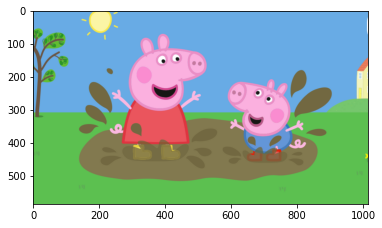

In [45]:
img = cv2.imread('/home/ziz/school/LOG795/images/peppa-pig.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (int(img.shape[1] * 15 / 100), 
#                         int(img.shape[0] * 15 / 100)), 
#                      interpolation = cv2.INTER_AREA)
plt.imshow(img)
print(img.shape)

In [4]:
Z = img.reshape(-1,3)
Z = np.float32(Z)

#Definir critere
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8

ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(center)

[[ 40.13889   29.86111   33.88889 ]
 [104.72822  170.13318  226.77158 ]
 [224.35728  148.7505   199.87825 ]
 [124.931786 116.29516   76.98884 ]
 [227.57666   82.94168   91.92008 ]
 [236.55487  235.12195  154.82317 ]
 [248.36102  175.62576  221.67389 ]
 [ 92.86718  190.55379   80.49753 ]]


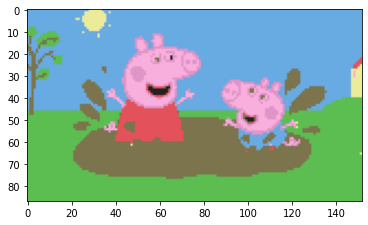

In [5]:
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape(img.shape)

# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.imshow('res2',res2)
plt.imshow(res2)

In [6]:
img_flat = img.reshape(-1,3)
img_flat.shape

(13224, 3)

In [7]:
from skimage import filters, color, morphology
from skimage.segmentation import flood, flood_fill

In [8]:
res2.shape

(87, 152, 3)

In [9]:
# img_center = [int(res2.shape[0]/2),int(res2.shape[1]/2)]
img_center = {'x':int(res2.shape[1]/2), 'y':int(res2.shape[0]/2)}

x1 = int(img_center['x'] - (0.5*img_center['x']))
x2 = int(img_center['x'] + (0.5*img_center['x']))

y1 = int(img_center['y']- (0.7*img_center['y']))
y2 = int(img_center['y'] + (0.7*img_center['y']))

rectangle = [x1,x2,y1,y2]
print(img_center)
print(rectangle)

{'x': 76, 'y': 43}
[38, 114, 12, 73]


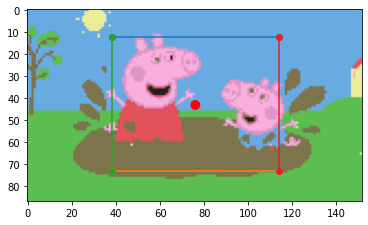

In [10]:
from matplotlib.patches import Arrow, Circle


patches = [Circle((img_center['x'], img_center['y']), radius=2, color='red')]

fig, ax = plt.subplots(1)
ax.imshow(res2)

for p in patches:
    ax.add_patch(p)

ax.plot([x1,x2],[y1,y1],
        [x1,x2],[y2,y2],
        [x1,x1],[y1,y2],
        [x2,x2],[y1,y2],marker='o')

plt.show()

In [11]:
print(res2.shape)
print(rectangle)

(87, 152, 3)
[38, 114, 12, 73]


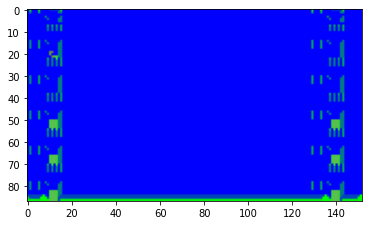

In [12]:
#rectangle = [x1,x2,y1,y2]
test = res2
seed = (0,0)
for y in range(res2.shape[0]):
    for x in range(res2.shape[1]):
        seed = (x,y)
        if y>y1 & y<y2 & x>x2 & x<x1:
            pass
        else:
            cv2.floodFill(test, None, seedPoint=seed, newVal=(0, 0, 255), loDiff=(5, 5, 5, 5), upDiff=(5, 5, 5, 5))
            cv2.circle(test, seed, 2, (0, 255, 0), cv2.FILLED, cv2.LINE_AA);
            
plt.imshow(test)

In [149]:
seed = (0,0)

cv2.floodFill(res2, None, seedPoint=seed, newVal=(0, 0, 255), loDiff=(5, 5, 5, 5), upDiff=(5, 5, 5, 5))
cv2.circle(res2, seed, 2, (0, 255, 0), cv2.FILLED, cv2.LINE_AA);
plt.imshow(res2)


SystemError: new style getargs format but argument is not a tuple

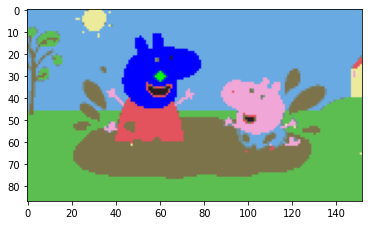

In [76]:
seed = (60,30)

cv2.floodFill(res2, None, seedPoint=seed, newVal=(0, 0, 255), loDiff=(5, 5, 5, 5), upDiff=(5, 5, 5, 5))
cv2.circle(res2, seed, 2, (0, 255, 0), cv2.FILLED, cv2.LINE_AA);
plt.imshow(res2)

In [66]:
print(res2.reshape(-1,3).shape)

(594790, 3)


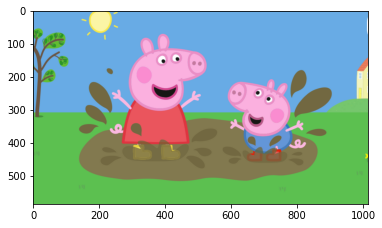

In [46]:
import cv2
import numpy as np

# Kmeans color segmentation
def kmeans_color_quantization(image, clusters=8, rounds=1):
    h, w = image.shape[:2]
    samples = np.zeros([h*w,3], dtype=np.float32)
    count = 0

    for x in range(h):
        for y in range(w):
            samples[count] = image[x][y]
            count += 1

    compactness, labels, centers = cv2.kmeans(samples,
            clusters, 
            None,
            (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10000, 0.0001), 
            rounds, 
            cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    res = centers[labels.flatten()]
    return res.reshape((image.shape))

# Load image and perform kmeans
image = cv2.imread('1.jpg')
kmeans = kmeans_color_quantization(img, clusters=5)
result = kmeans.copy()

# Floodfill
seed_point = (50, 80)
cv2.floodFill(result, None, seedPoint=seed_point, newVal=(36, 255, 12), loDiff=(0, 0, 0, 0), upDiff=(0, 0, 0, 0))

# cv2.imshow('image', img)
# cv2.imshow('kmeans', kmeans)
# cv2.imshow('result', result)
# cv2.waitKey() 

# plt.subplot(3, 3, 1)
plt.imshow(img)
# plt.subplot(3, 3, 2)
# plt.imshow(kmeans)
# plt.subplot(3, 3, 3)
# plt.imshow(result)
plt.show()

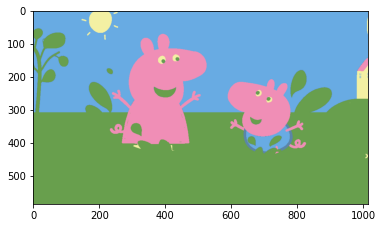

In [47]:
plt.imshow(kmeans)


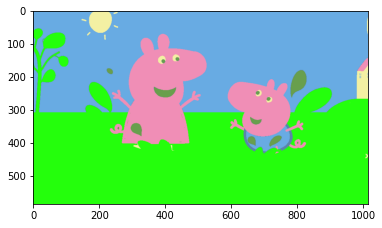

In [48]:
plt.imshow(result)


In [97]:
import cv2
import numpy as np

image = cv2.imread('pomme.jpg')
# image = cv2.imread('/home/ziz/school/LOG795/images/peppa-pig.png')

original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
canny = cv2.Canny(blurred, 120, 255, 1)
kernel = np.ones((5,5),np.uint8)
dilate = cv2.dilate(canny, kernel, iterations=1)

# Find contours
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Iterate thorugh contours and filter for ROI
image_number = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    cv2.imwrite("object_extracted/ROI_{}.png".format(image_number), ROI)
    image_number += 1

# print(ROI)

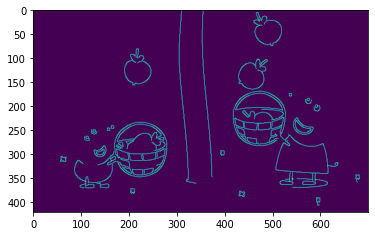

In [87]:
plt.imshow(canny)

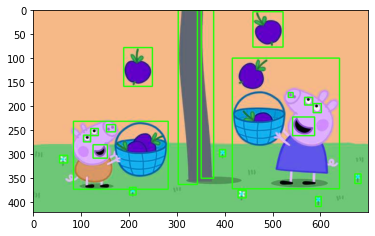

In [88]:
plt.imshow(image)
